In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [7]:
# Загрузка данных
df_bp=pd.read_excel('X_bp.xlsx', index_col=0)
df_nup=pd.read_excel('X_nup.xlsx', index_col=0)

In [8]:
df_bp. head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0
7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0
8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0
9,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0


In [9]:
df_nup. head(10)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.0,57.0
1,0,4.0,60.0
2,0,4.0,70.0
3,0,5.0,47.0
4,0,5.0,57.0
5,0,5.0,60.0
6,0,5.0,70.0
7,0,7.0,47.0
8,0,7.0,57.0
9,0,7.0,60.0


In [10]:
# Объединение данных в одну таблицу
df = df_bp.merge(df_nup, left_index=True,right_index=True, how='inner')


In [6]:
df. head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0
7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0,7.0,47.0
8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0,7.0,57.0
9,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0,7.0,60.0


In [11]:
# Информация по новому датасету. Нулевых значений нет

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
Соотношение матрица-наполнитель         1023 non-null float64
Плотность, кг/м3                        1023 non-null float64
модуль упругости, ГПа                   1023 non-null float64
Количество отвердителя, м.%             1023 non-null float64
Содержание эпоксидных групп,%_2         1023 non-null float64
Температура вспышки, С_2                1023 non-null float64
Поверхностная плотность, г/м2           1023 non-null float64
Модуль упругости при растяжении, ГПа    1023 non-null float64
Прочность при растяжении, МПа           1023 non-null float64
Потребление смолы, г/м2                 1023 non-null float64
Угол нашивки, град                      1023 non-null int64
Шаг нашивки                             1023 non-null float64
Плотность нашивки                       1023 non-null float64
dtypes: float64(12), int64(1)
memory usage: 111.9 KB


In [8]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930,0.913,0.389,2.318,2.907,3.553,5.592
"Плотность, кг/м3",1023.0,1975.735,73.729,1731.765,1924.155,1977.622,2021.374,2207.773
"модуль упругости, ГПа",1023.0,739.923,330.232,2.437,500.047,739.664,961.813,1911.536
"Количество отвердителя, м.%",1023.0,110.571,28.296,17.740,92.443,110.565,129.730,198.953
"Содержание эпоксидных групп,%_2",1023.0,22.244,2.406,14.255,20.608,22.231,23.962,33.000
"Температура вспышки, С_2",1023.0,285.882,40.943,100.000,259.067,285.897,313.002,413.273
"Поверхностная плотность, г/м2",1023.0,482.732,281.315,0.604,266.817,451.864,693.225,1399.542
"Модуль упругости при растяжении, ГПа",1023.0,73.329,3.119,64.054,71.245,73.269,75.357,82.682
"Прочность при растяжении, МПа",1023.0,2466.923,485.628,1036.857,2135.850,2459.525,2767.193,3848.437
"Потребление смолы, г/м2",1023.0,218.423,59.736,33.803,179.628,219.199,257.482,414.591


In [12]:
# дубликатов нет
df.duplicated().sum()

0

In [10]:
# Описательная статистика
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930,0.913,0.389,2.318,2.907,3.553,5.592
"Плотность, кг/м3",1023.0,1975.735,73.729,1731.765,1924.155,1977.622,2021.374,2207.773
"модуль упругости, ГПа",1023.0,739.923,330.232,2.437,500.047,739.664,961.813,1911.536
"Количество отвердителя, м.%",1023.0,110.571,28.296,17.740,92.443,110.565,129.730,198.953
"Содержание эпоксидных групп,%_2",1023.0,22.244,2.406,14.255,20.608,22.231,23.962,33.000
"Температура вспышки, С_2",1023.0,285.882,40.943,100.000,259.067,285.897,313.002,413.273
"Поверхностная плотность, г/м2",1023.0,482.732,281.315,0.604,266.817,451.864,693.225,1399.542
"Модуль упругости при растяжении, ГПа",1023.0,73.329,3.119,64.054,71.245,73.269,75.357,82.682
"Прочность при растяжении, МПа",1023.0,2466.923,485.628,1036.857,2135.850,2459.525,2767.193,3848.437
"Потребление смолы, г/м2",1023.0,218.423,59.736,33.803,179.628,219.199,257.482,414.591


In [11]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [13]:
df.dtypes

Соотношение матрица-наполнитель         float64
Плотность, кг/м3                        float64
модуль упругости, ГПа                   float64
Количество отвердителя, м.%             float64
Содержание эпоксидных групп,%_2         float64
Температура вспышки, С_2                float64
Поверхностная плотность, г/м2           float64
Модуль упругости при растяжении, ГПа    float64
Прочность при растяжении, МПа           float64
Потребление смолы, г/м2                 float64
Угол нашивки, град                        int64
Шаг нашивки                             float64
Плотность нашивки                       float64
dtype: object

In [13]:
# Визуализация. "Ящик с усами", гистограммы, парные графики.
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

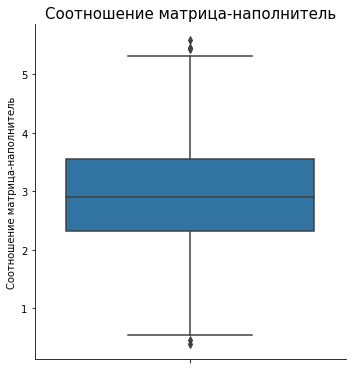

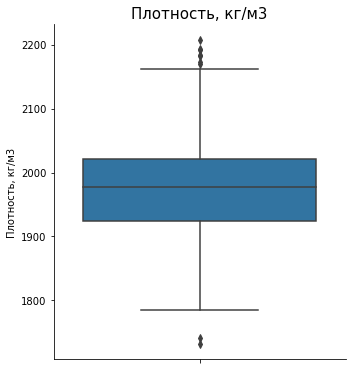

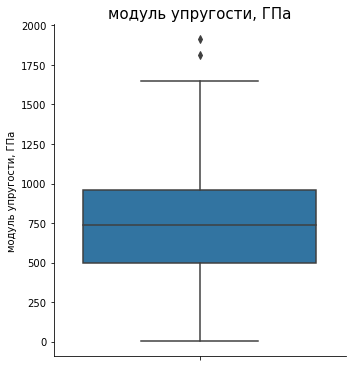

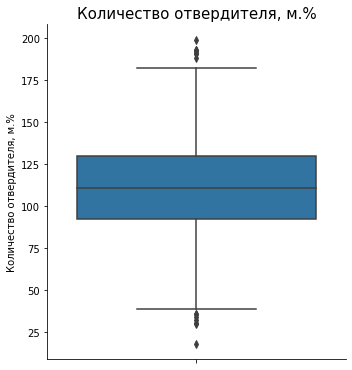

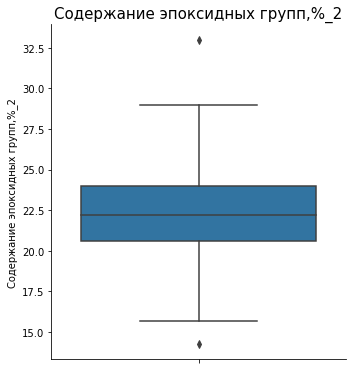

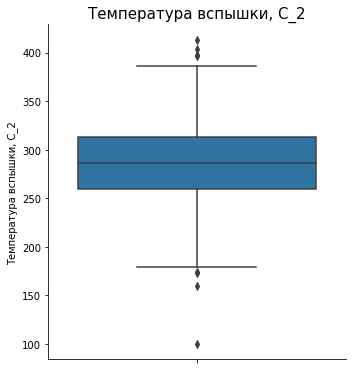

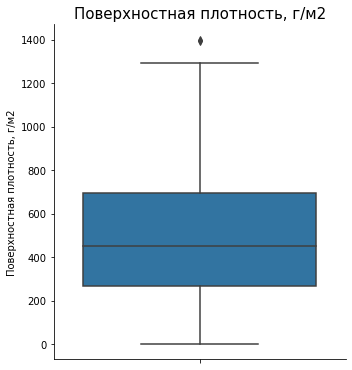

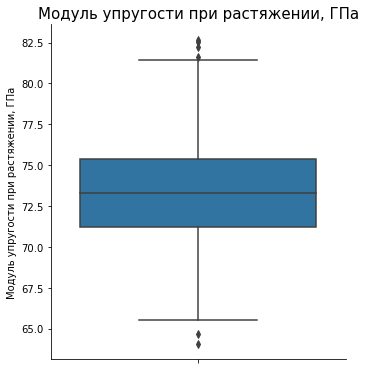

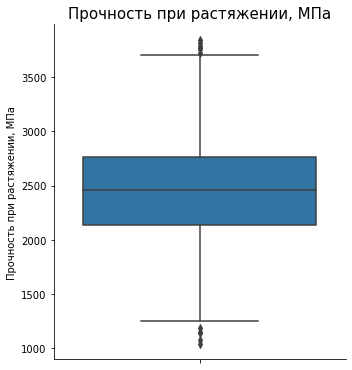

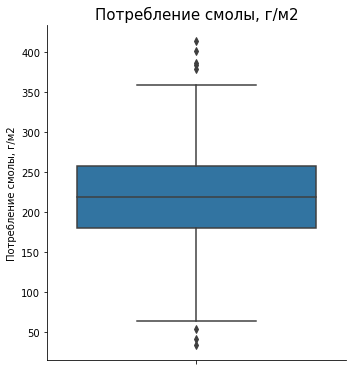

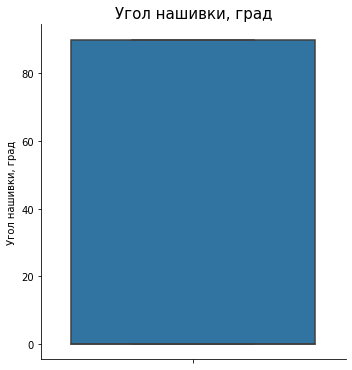

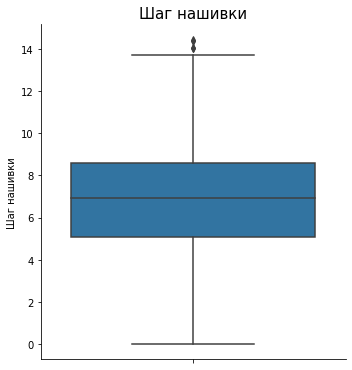

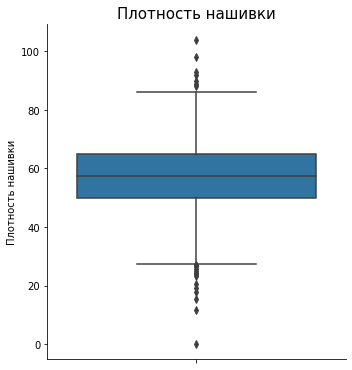

In [14]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box')
    plt.title(col, fontsize=15)

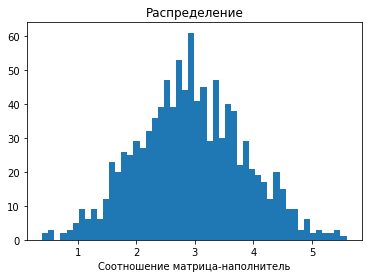

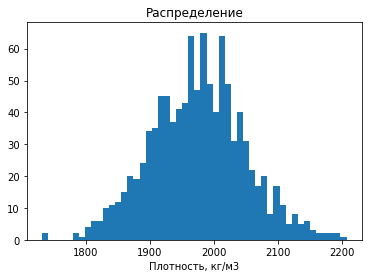

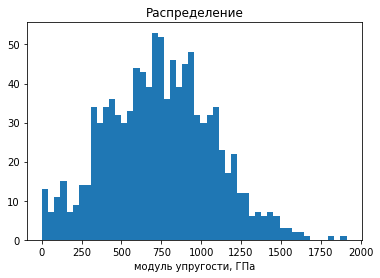

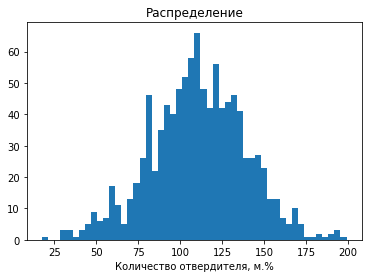

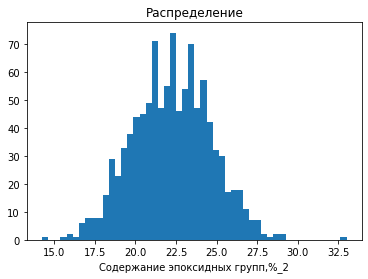

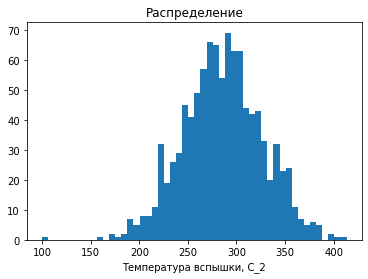

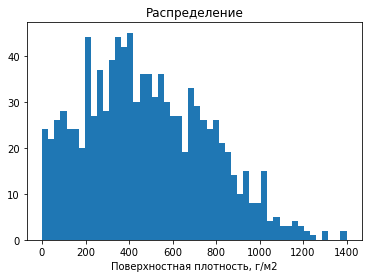

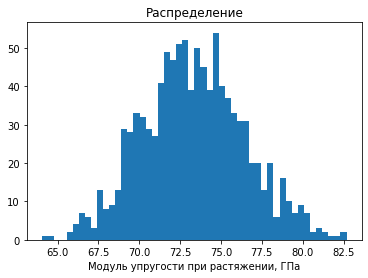

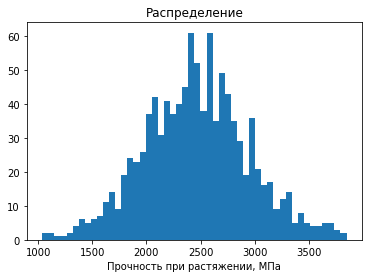

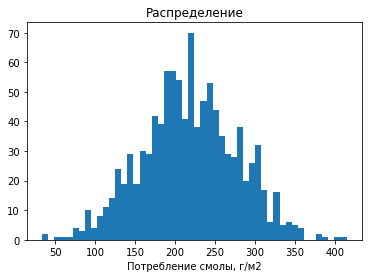

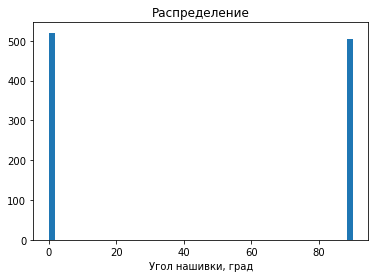

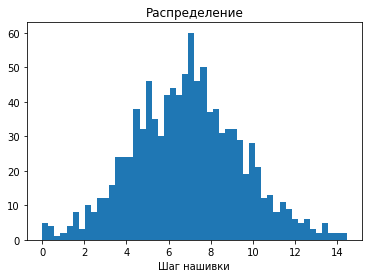

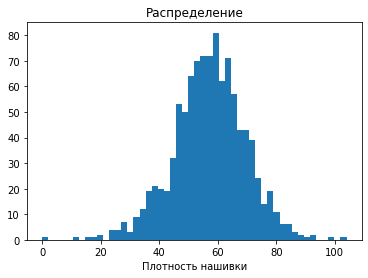

In [15]:
for col in df.columns:
    
    plt.title("Распределение")
    plt.xlabel(col)
    plt.ylabel("")
    plt.hist(df[col], bins = 50)
    plt.show()

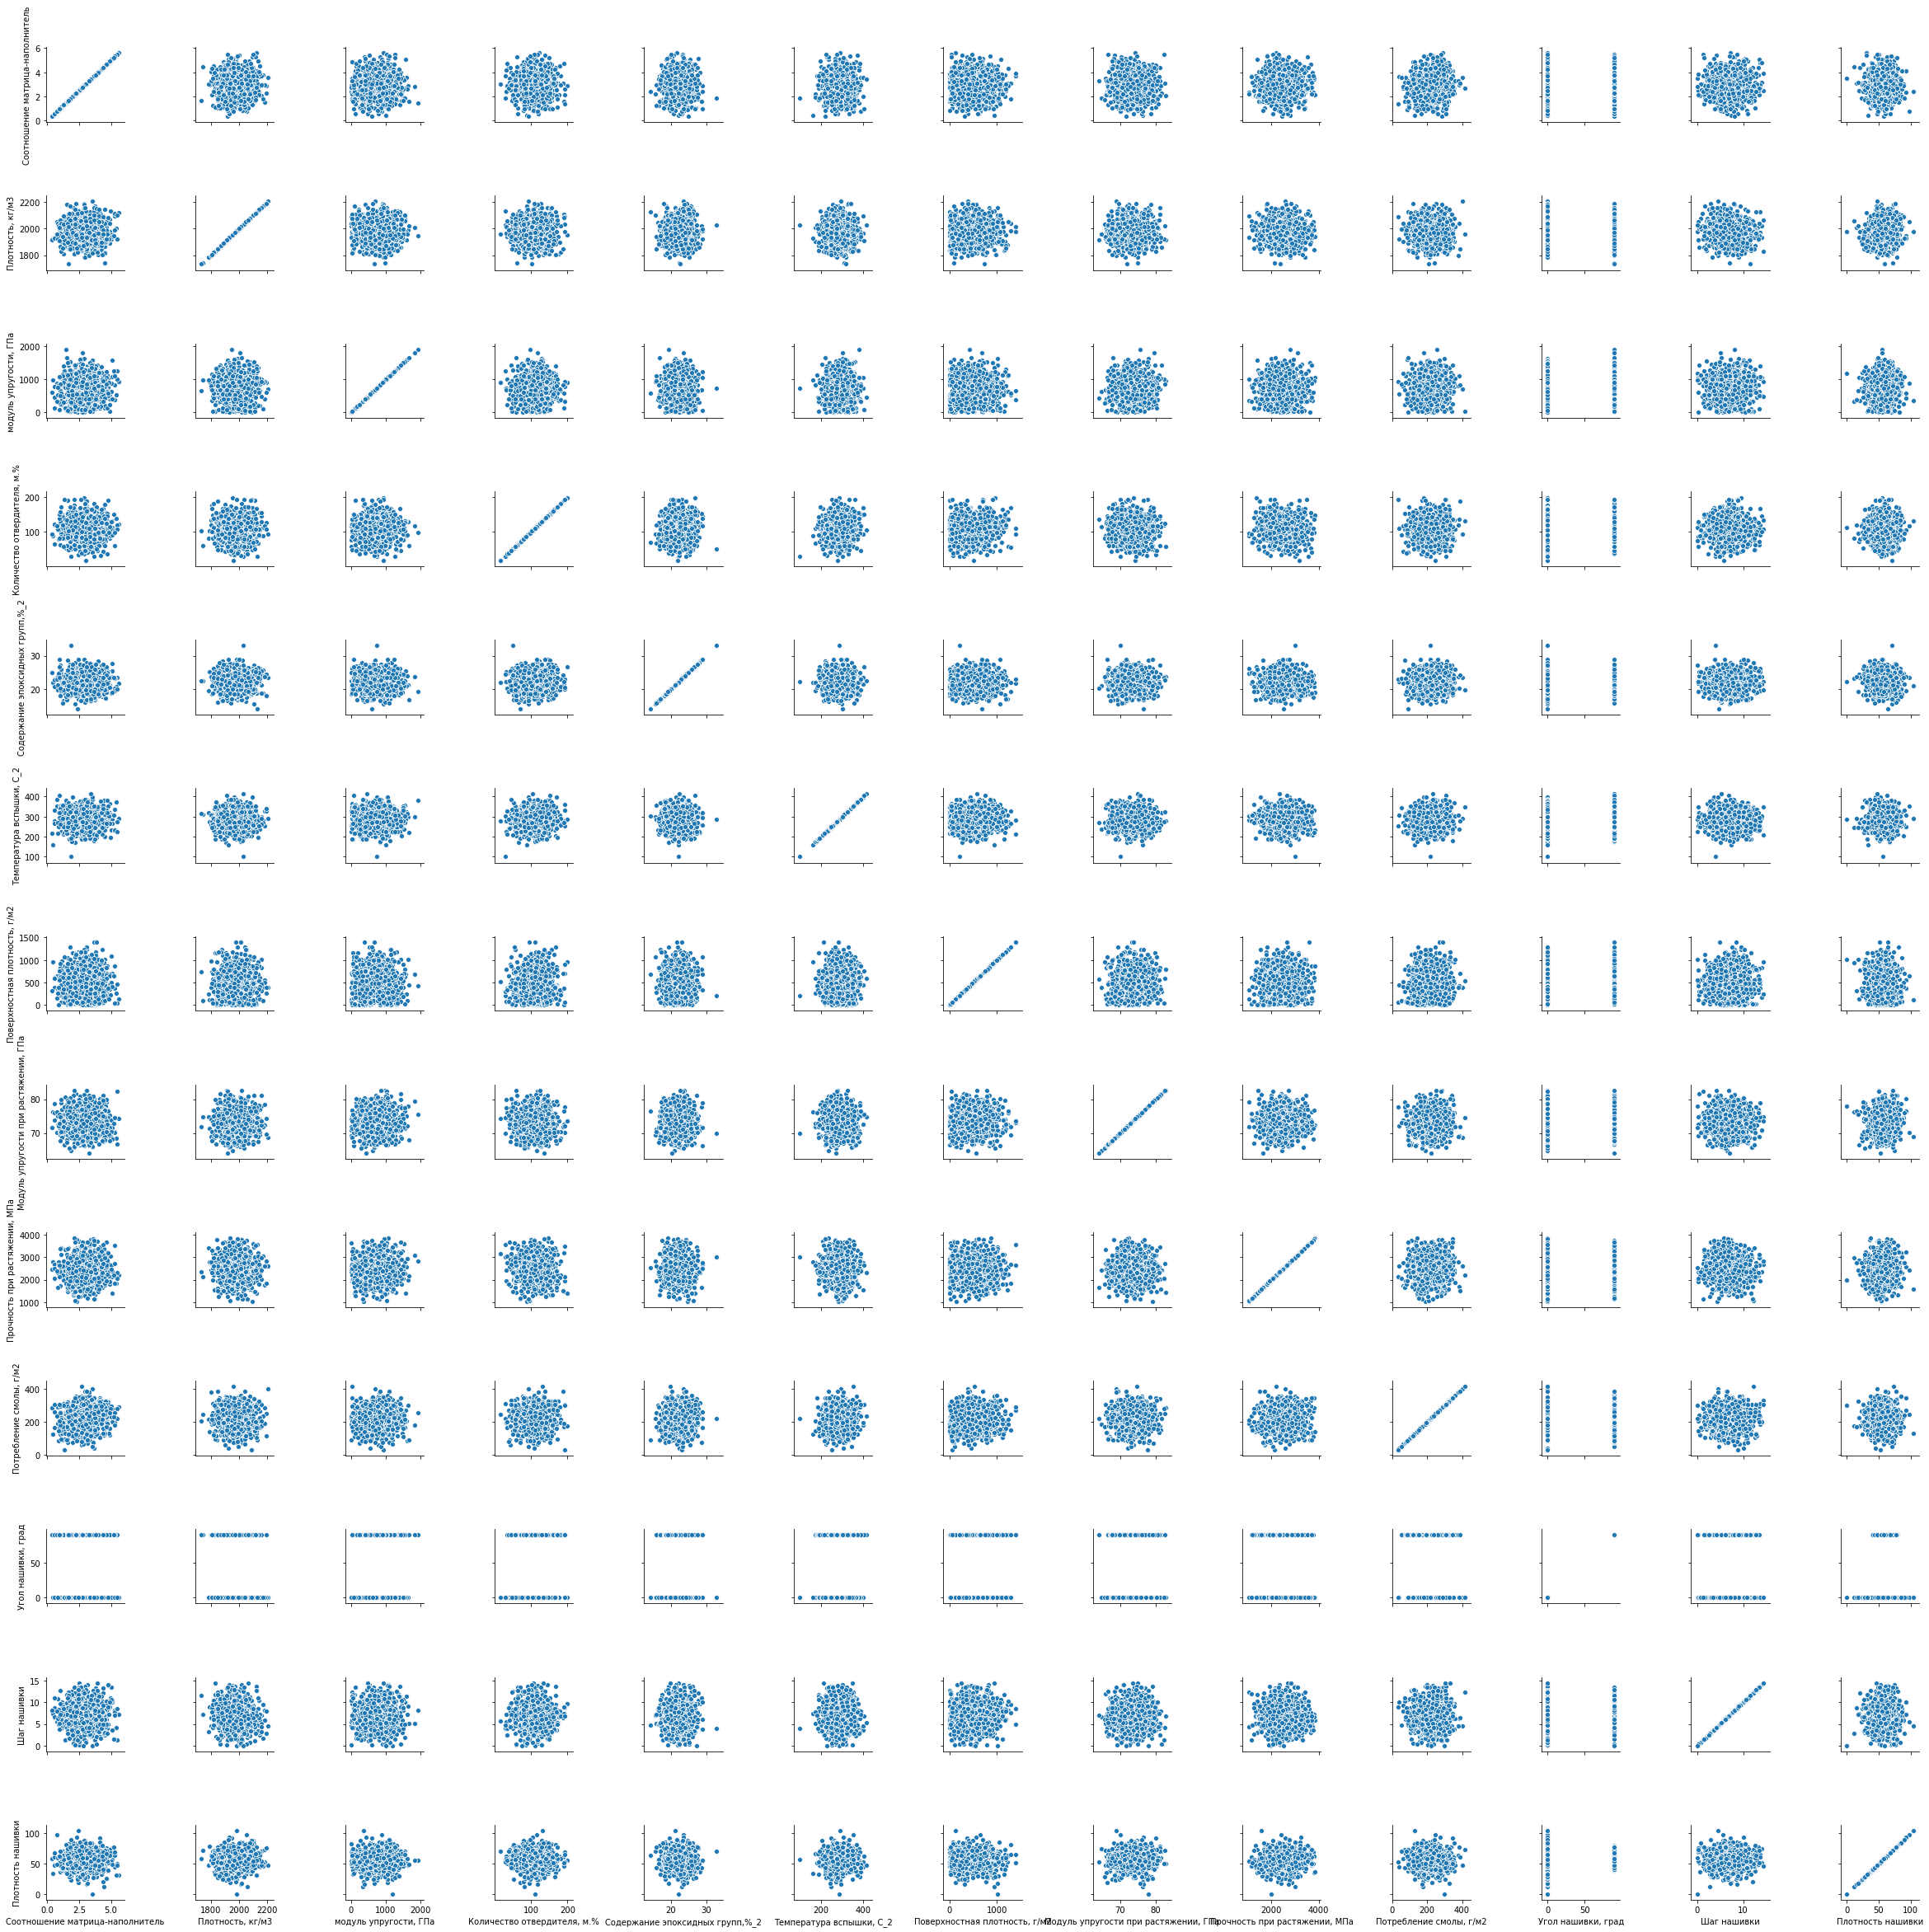

In [16]:
cols = df.columns
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

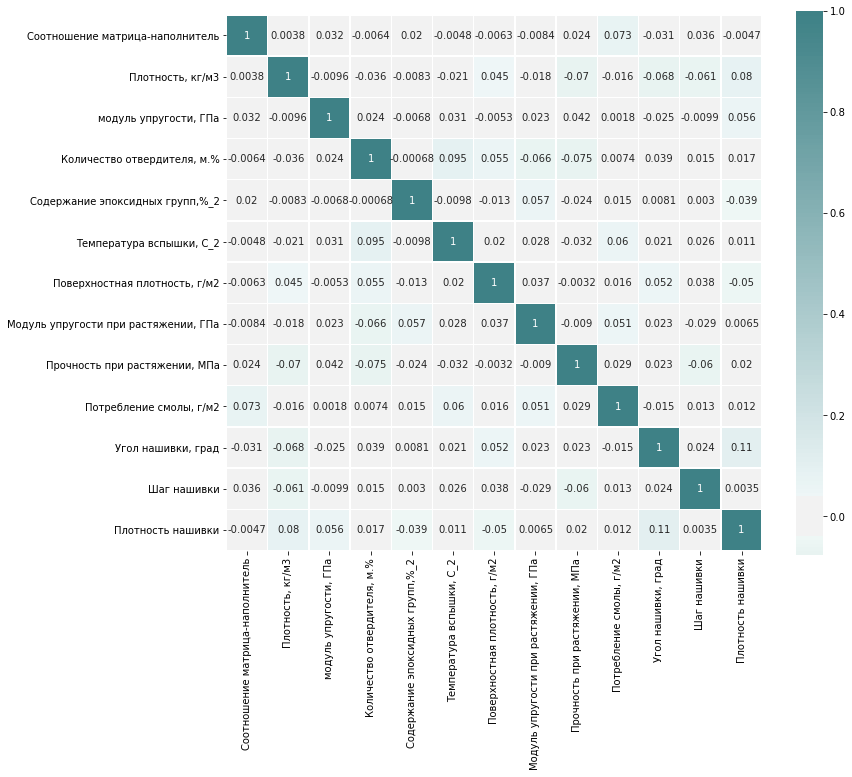

In [17]:
# Корреляция
corr = df.corr()

# Создаем полотно для отображения графика
f, ax = plt.subplots(figsize = (12, 10))

# Создаем цветовую политру
cmap = sns.diverging_palette(170, 200, as_cmap=True)

# Визуализируем данные кореляции
sns.heatmap( corr, ax = ax, cmap = cmap, linewidths = 0.5, annot = True, center = 0, square = True);

In [15]:
for x in df.columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [16]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [17]:
#Значений не слишком много, их можно исключить.
df = df.dropna(axis = 0)

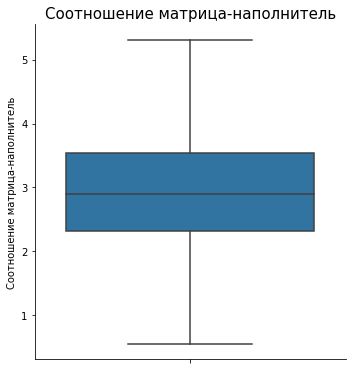

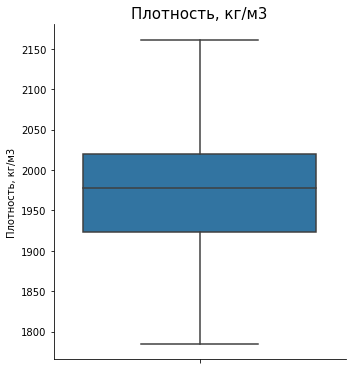

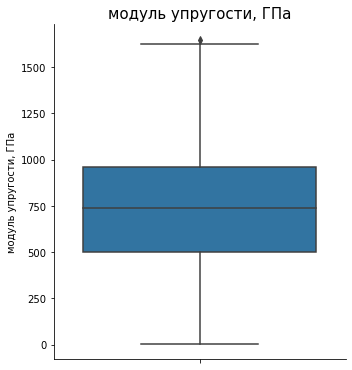

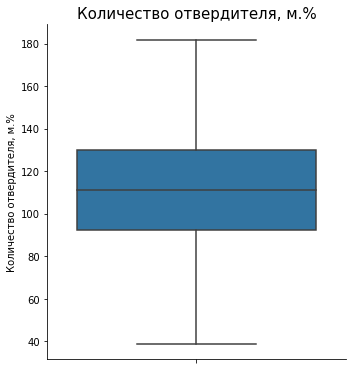

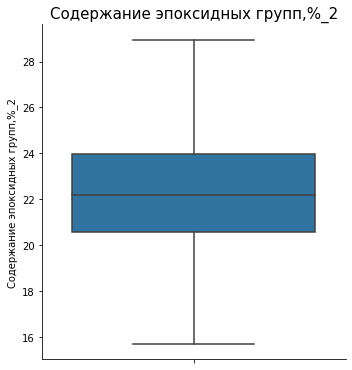

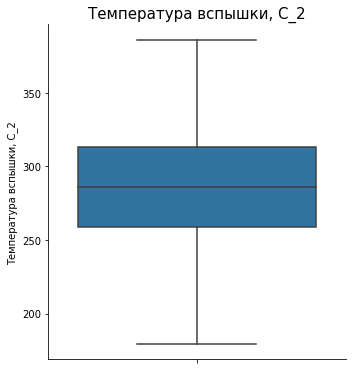

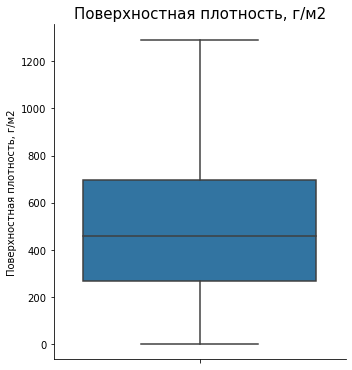

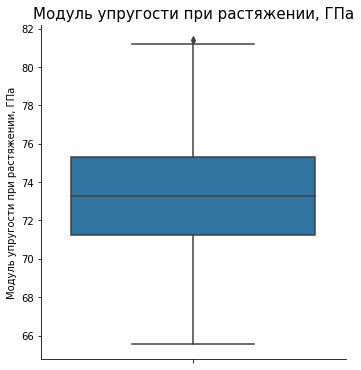

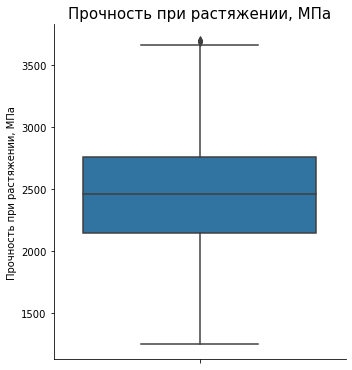

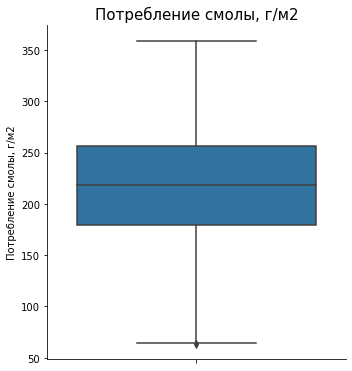

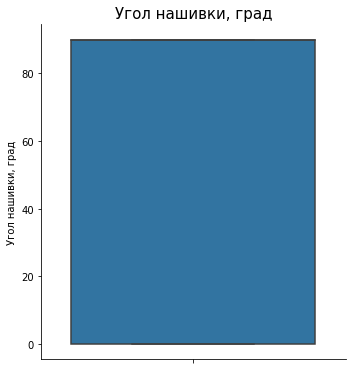

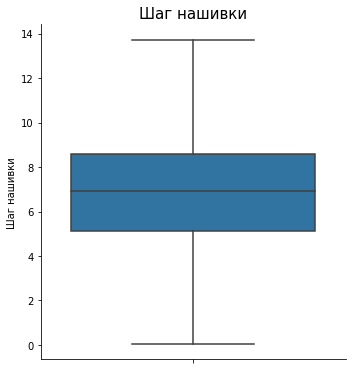

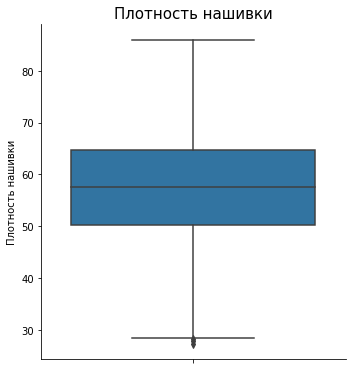

In [18]:
#Проверим качество сета после обработки.
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box')
    plt.title(col, fontsize=15)

In [19]:
# Нормализация
scaler = MinMaxScaler()

norm_df=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
norm_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Моделирование
target = norm_df['Прочность при растяжении, МПа']
train = norm_df[['Соотношение матрица-наполнитель',  'модуль упругости, ГПа']]

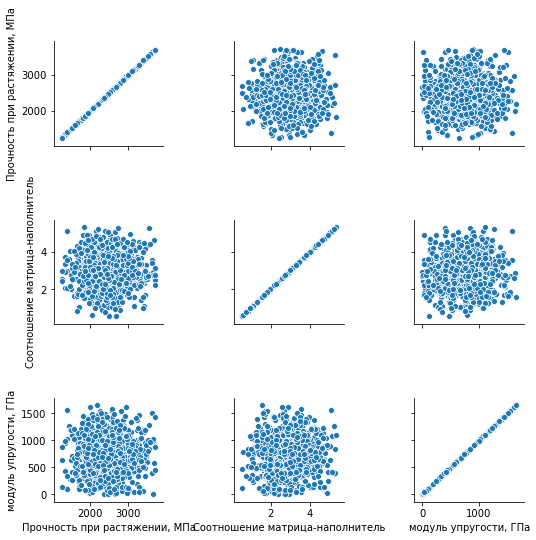

In [21]:
cols=['Прочность при растяжении, МПа','Соотношение матрица-наполнитель',  'модуль упругости, ГПа']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

In [22]:
# Линейная регрессия
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)
Xtrn

,Соотношение матрица-наполнитель,"модуль упругости, ГПа"
138,0.297161,0.591123
112,0.497718,0.336587
657,0.518977,0.271519
594,0.499335,0.194074
994,0.687416,0.462350
757,0.494837,0.509068
442,0.627252,0.553485
781,0.485825,0.509710
870,0.781261,0.736810
285,0.695940,0.222839


In [23]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(Xtrn, Ytrn)
pred1 = lin_reg_mod.predict(Xtrn)
pred2 = lin_reg_mod.predict(Xtest)

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(Ytrn, pred1),
        mean_squared_error(Ytest, pred2)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(Ytrn, pred1),
        r2_score(Ytest, pred2)))

MSE train: 0.036, test: 0.036
R^2 train: 0.010, test: -0.029


In [24]:
# Полиноминальная регрессия
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Xtrn)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Ytrn)

X_p = poly_reg.fit_transform(Xtest)
pred = lin_reg2.predict(X_p)

test_set_rmse = (np.sqrt(mean_squared_error(Ytest, pred)))

test_set_r2 = r2_score(Ytest, pred)
print('MSE  test: {:.3f}'. format(test_set_rmse))
print('R^2 test: {:.3f}'. format(test_set_r2))

MSE  test: 0.191
R^2 test: -0.045


In [25]:
# Случайный лес
model = RandomForestRegressor(n_estimators=1000, max_depth=5)
model.fit(Xtrn, Ytrn)
y_pred_forest = model.predict(Xtest)
print('R^2 test: {:.3f}'. format(r2_score(Ytest, y_pred_forest)))

R^2 test: -0.068


In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

TypeError: Expected a message Descriptor, got Descriptor